In [68]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from icecream import ic
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

df = pd.read_csv(file_path, header = 0)


In [69]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [70]:
lm = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

Yhat=lm.predict(X)
Yhat[0:5]

ic(lm.intercept_)
ic(lm.coef_)

ic| lm.intercept_: 38423.3058581574


ic| lm.coef_: array([-821.73337832])


array([-821.73337832])

In [71]:
lm1 = LinearRegression()
X = df[['engine-size']]
Y = df["price"]
lm1.fit(X, Y)

ic(lm1.intercept_)
ic(lm1.coef_)

ic| lm1.intercept_: -7963.338906281042
ic| lm1.coef_: array([166.86001569])


array([166.86001569])

In [72]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

ic(lm.intercept_)
ic(lm.coef_)

ic| lm.intercept_: -15806.624626329209
ic| lm.coef_: array([53.49574423,  4.70770099, 81.53026382, 36.05748882])


array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [73]:
lm2 = LinearRegression()
PREDICTORS = df[["normalized-losses","highway-mpg"]]
Y = df[['price']]
lm2.fit(PREDICTORS, Y)

ic(lm2.intercept_, lm2.coef_)

ic| lm2.intercept_: array([38201.31327246])
    lm2.coef_: array([[   1.49789586, -820.45434016]])


(array([38201.31327246]), array([[   1.49789586, -820.45434016]]))

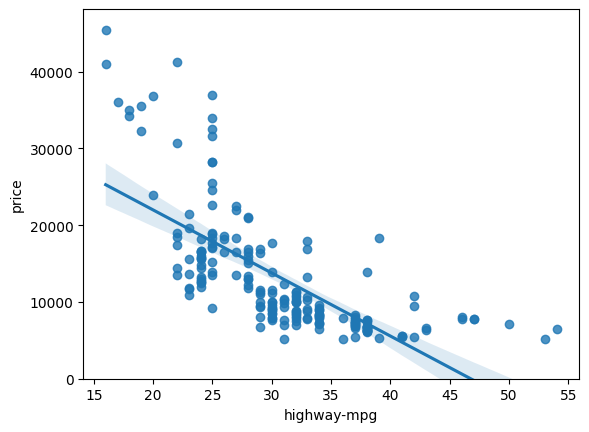

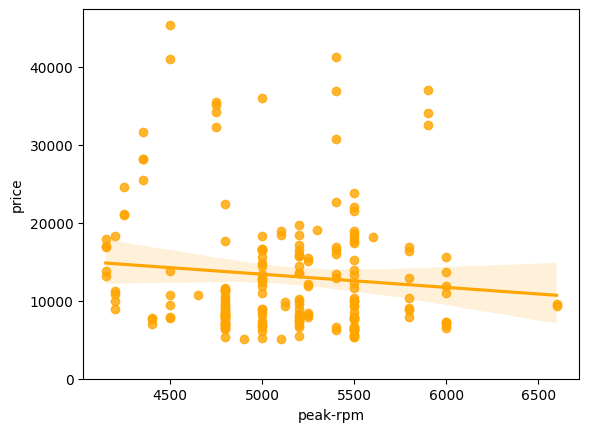

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


In [74]:
%matplotlib inline 
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.show()
sns.regplot(x="peak-rpm", y="price", data=df, color = 'orange')
plt.ylim(0,)
plt.show()


df[["highway-mpg", "peak-rpm", "price"]].corr()

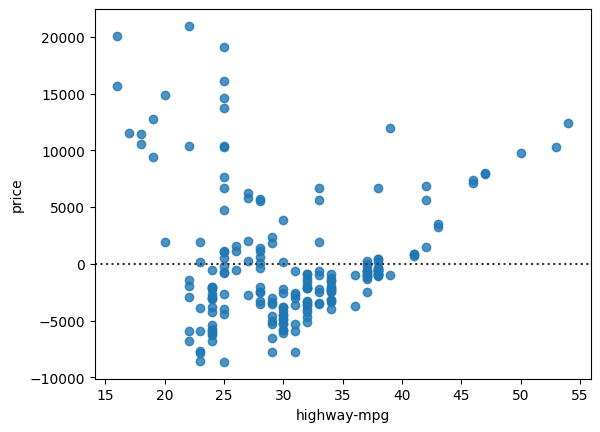

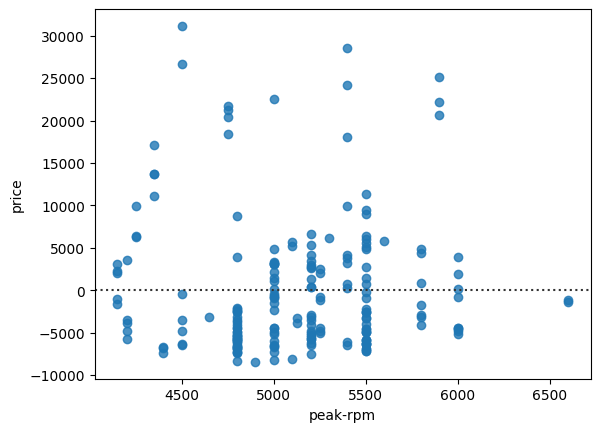

In [75]:
sns.residplot(x = 'highway-mpg', y = 'price', data =df)
plt.show()
sns.residplot(x = 'peak-rpm', y = 'price', data =df)
plt.show()

/tmp/ipykernel_56911/2193618043.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
/tmp/ipykernel_56911/2193618043.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Va

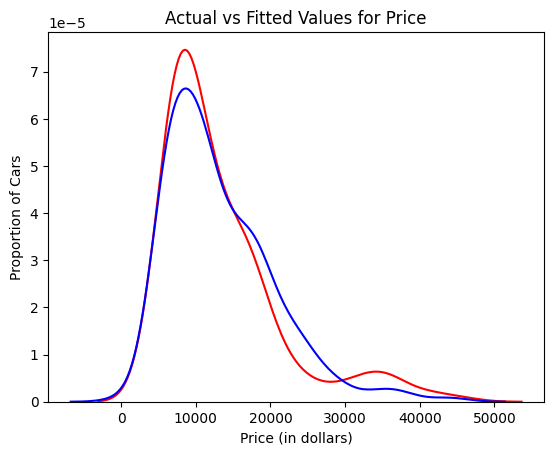

In [76]:
Y_hat = lm.predict(Z)
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [77]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


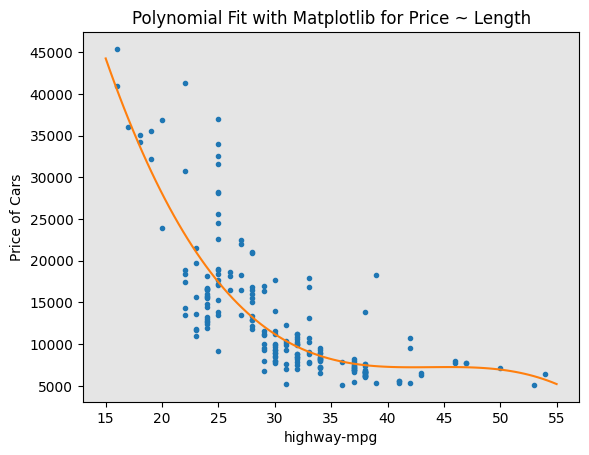

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [78]:
x = df['highway-mpg']
y = df['price']

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

PlotPolly(p, x, y, 'highway-mpg')

np.polyfit(x, y, 3)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


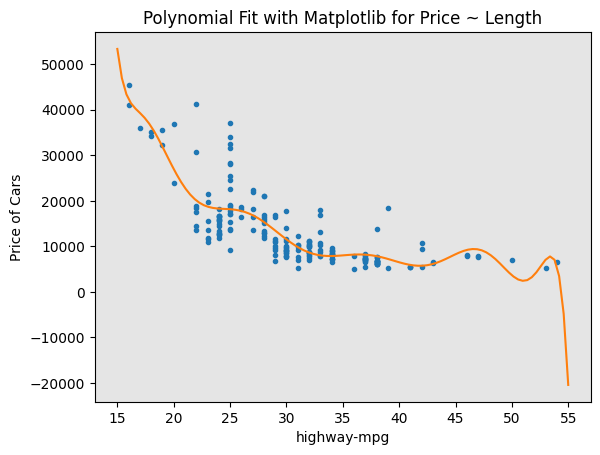

In [79]:
x = df['highway-mpg']
y = df['price']

f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)

PlotPolly(p, x, y, 'highway-mpg')

In [80]:
pr=PolynomialFeatures(degree=2)
pr
Z_pr=pr.fit_transform(Z)
Z.shape
# Z_pr.shape

(201, 4)

In [81]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [82]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [83]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [84]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [85]:
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))
mse = mean_squared_error(df['price'], Yhat)

The R-square is:  0.7609686443622008


In [86]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [88]:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


/home/basmu/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


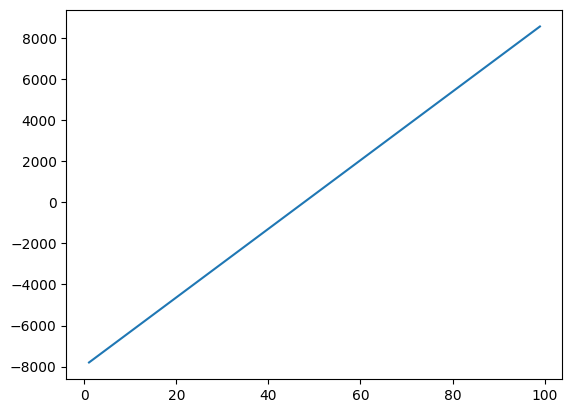

In [92]:
%matplotlib inline 
new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X, Y)
lm

yhat=lm.predict(new_input)
yhat[0:5]
plt.plot(new_input, yhat)
plt.show()